# Experiment 1 : Visualize the features in dataset

## Experiment 1.1 : Read an IRIS dataset
Dataset can be downloaded from here. https://gist.github.com/netj/8836201
Save IRIS as .csv file format and use it in the lab with pandas.

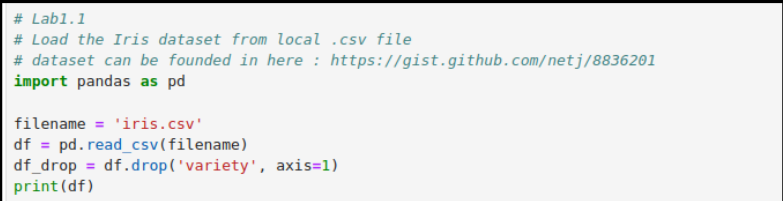

In [1]:
#Lab 1.1 Here

import pandas as pd

filename ='iris.csv'
df = pd.read_csv(filename)
df_drop = df.drop('variety', axis=1)
print(df)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


## Experiment 1.2 : Plot the histograms

The feature data is four dimensional, but we can visualize one or two of the dimensions at a
time using a simple histogram in matplotlib.

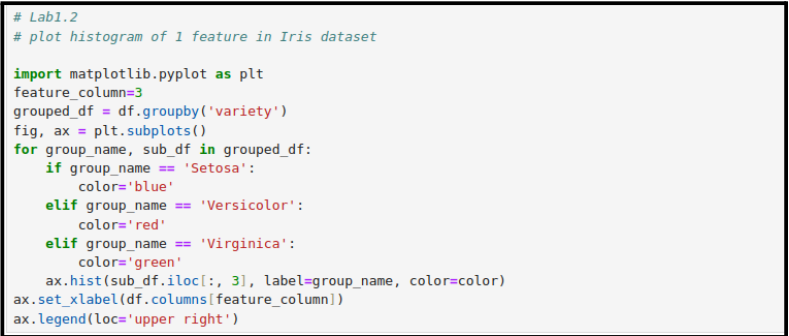

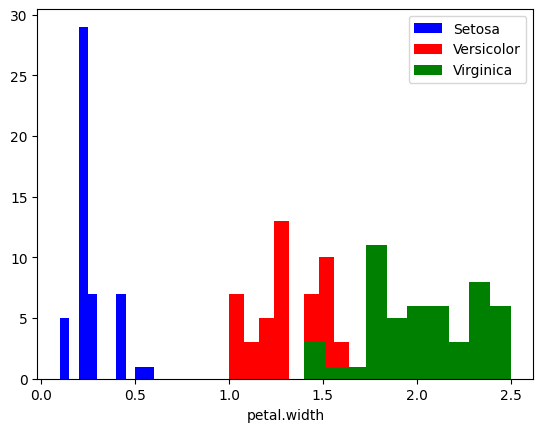

In [2]:
#Lab 1.2

import matplotlib.pyplot as plt
feature_column = 3
grouped_df = df.groupby('variety')
fig, ax = plt.subplots()
for group_name, sub_df in grouped_df:
  if group_name == 'Setosa':
    color='blue'
  elif group_name == 'Versicolor':
    color='red'
  elif group_name == 'Virginica':
    color='green'
  ax.hist(sub_df.iloc[:,3], label=group_name, color=color)
ax.set_xlabel(df.columns[feature_column])
ax.legend(loc='upper right')

## Experiment 1.3 : Plot the features with 2-D Scatterplot (Manually)
We will now look at all feature combinations in one combined diagram, by using the scatter plot
in matplotlib
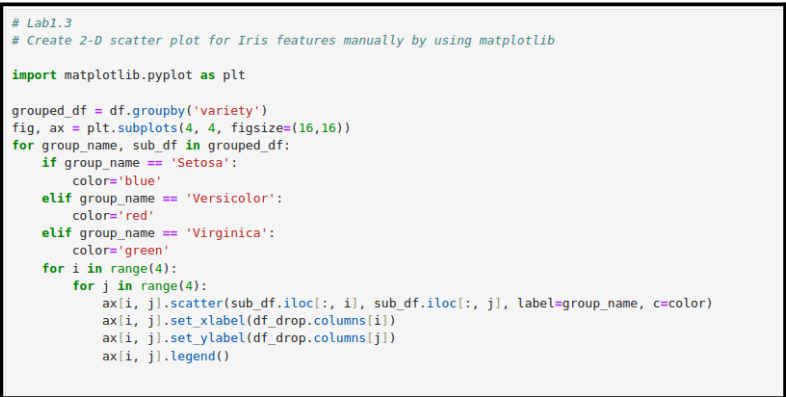

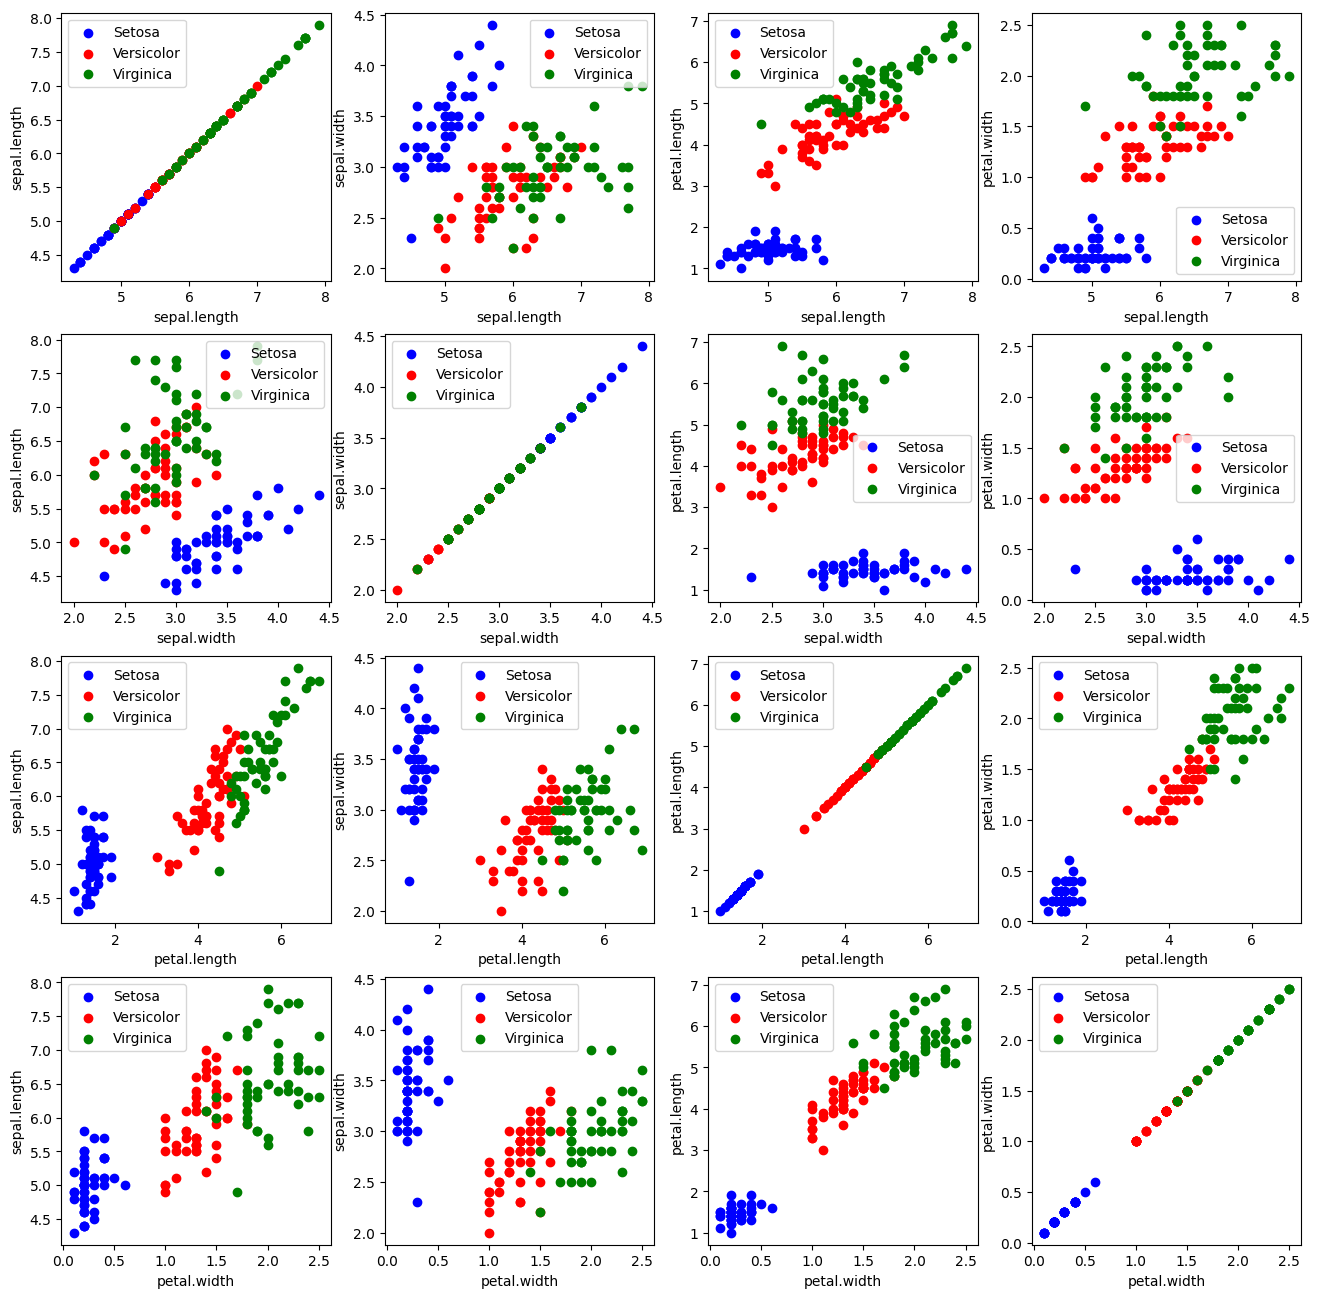

In [3]:
#Lab 1.3

import matplotlib.pyplot as plt

grouped_df = df.groupby('variety')
fig, ax = plt.subplots(4,4, figsize=(16,16))
for group_name, sub_df in grouped_df:
  if group_name == 'Setosa':
    color='blue'
  elif group_name == 'Versicolor':
    color='red'
  elif group_name == 'Virginica':
    color='green'
  for i in range (4):
    for j in range (4):
      ax[i, j].scatter(sub_df.iloc[:,i], sub_df.iloc[:,j], label=group_name, c=color)
      ax[i, j].set_xlabel(df_drop.columns[i])
      ax[i, j].set_ylabel(df_drop.columns[j])
      ax[i, j].legend()

## Experiment 1.4 : Plot the features with 2-D Scatterplot with pandas
Instead of doing it manually we can also use the scatterplot matrix provided by the pandas
module.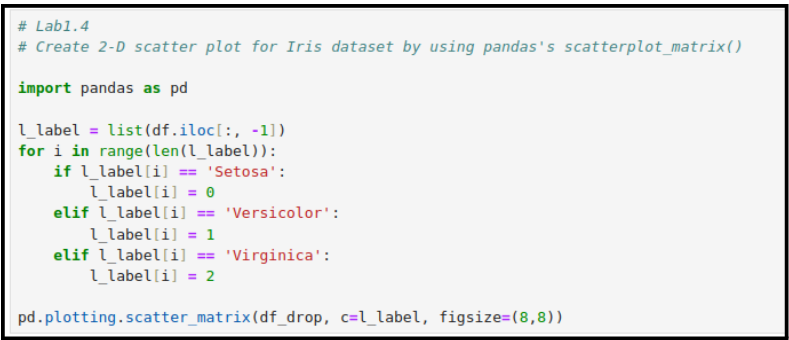

array([[<AxesSubplot: xlabel='sepal.length', ylabel='sepal.length'>,
        <AxesSubplot: xlabel='sepal.width', ylabel='sepal.length'>,
        <AxesSubplot: xlabel='petal.length', ylabel='sepal.length'>,
        <AxesSubplot: xlabel='petal.width', ylabel='sepal.length'>],
       [<AxesSubplot: xlabel='sepal.length', ylabel='sepal.width'>,
        <AxesSubplot: xlabel='sepal.width', ylabel='sepal.width'>,
        <AxesSubplot: xlabel='petal.length', ylabel='sepal.width'>,
        <AxesSubplot: xlabel='petal.width', ylabel='sepal.width'>],
       [<AxesSubplot: xlabel='sepal.length', ylabel='petal.length'>,
        <AxesSubplot: xlabel='sepal.width', ylabel='petal.length'>,
        <AxesSubplot: xlabel='petal.length', ylabel='petal.length'>,
        <AxesSubplot: xlabel='petal.width', ylabel='petal.length'>],
       [<AxesSubplot: xlabel='sepal.length', ylabel='petal.width'>,
        <AxesSubplot: xlabel='sepal.width', ylabel='petal.width'>,
        <AxesSubplot: xlabel='petal.length',

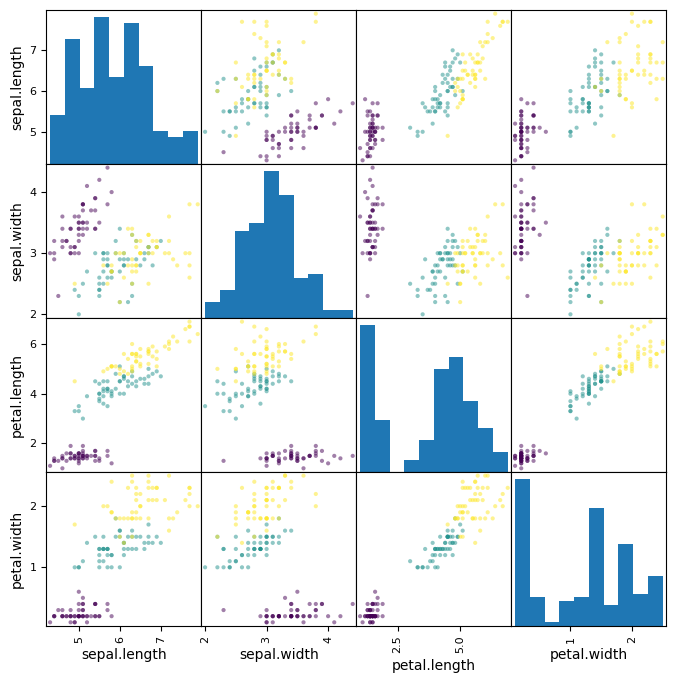

In [4]:
#Lab 1.4

import pandas as pd

l_label = list(df.iloc[:, -1])
for i in range(len(l_label)):
  if l_label[i] == 'Setosa':
    l_label[i] = 0
  if l_label[i] == 'Versicolor':
    l_label[i] = 1
  if l_label[i] == 'Virginica':
    l_label[i] = 2

pd.plotting.scatter_matrix(df_drop, c=l_label, figsize=(8,8))

## Experiment 1.5 : Plot the features with 3-D Scatterplot
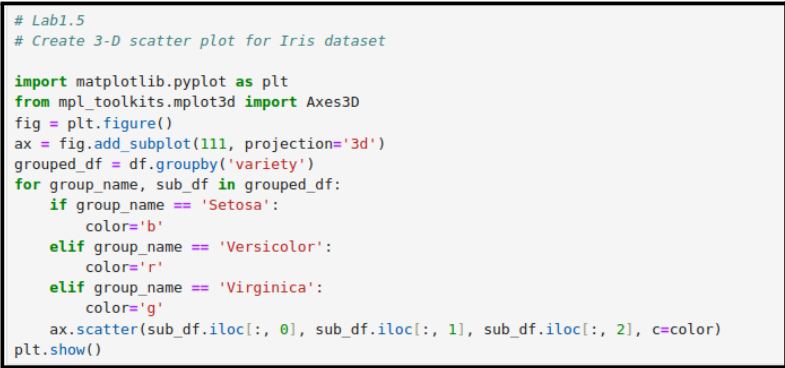

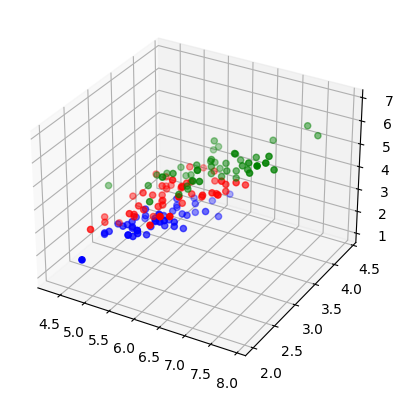

In [5]:
#Lab 1.5

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
grouped_df = df.groupby('variety')
for group_name, sub_df in grouped_df:
  if group_name == 'Setosa':
    color='b'
  elif group_name == 'Versicolor':
    color='r'
  elif group_name == 'Virginica':
    color='g'
  ax.scatter(sub_df.iloc[:, 0], sub_df.iloc[:, 1], sub_df.iloc[:, 2], c=color)
plt.show()

# Experiment 2 : Reducing dimensionality

## Experiment 2.1 : PCA


### 1) Let's use the iris dataset, but it's better if you use your own data
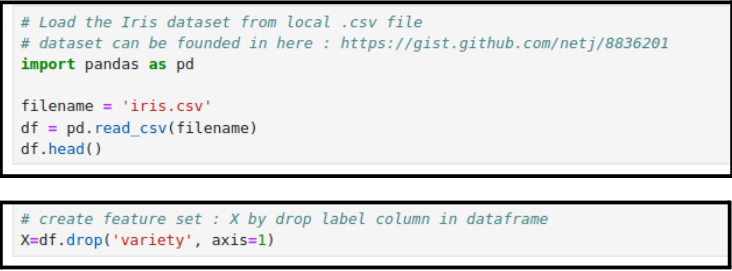

In [6]:
import pandas as pd

filename = 'iris.csv'
df = pd.read_csv(filename)
df.head()

# create feature set : X by drop label column in dataframe
X = df.drop('variety', axis=1)

### 2) Create PCA object
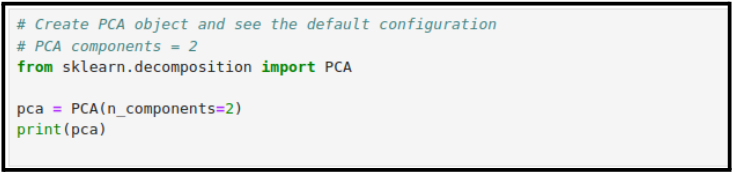

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
print(pca)

PCA(n_components=2)


### 3) Fit the PCA object with IRIS dataset
Run fit and transform. After the PCA object has been fitted, we can see how well it has done at
explaining the variance
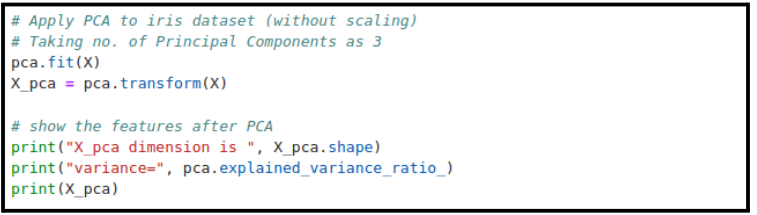

In [8]:
pca.fit(X)
X_pca = pca.transform(X)

print("X_pca dimension is ", X_pca.shape)
print("variance=", pca.explained_variance_ratio_)
print(X_pca)

X_pca dimension is  (150, 2)
variance= [0.92461872 0.05306648]
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12

### 4) Plot PCA
To visualize what PCA has done, let's plot the first two dimensions of the iris dataset with
before-after pictures of the PCA transformation:
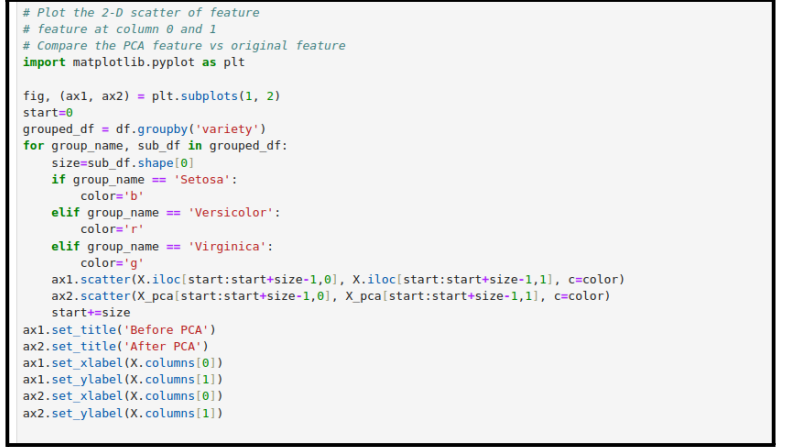

Text(0, 0.5, 'sepal.width')

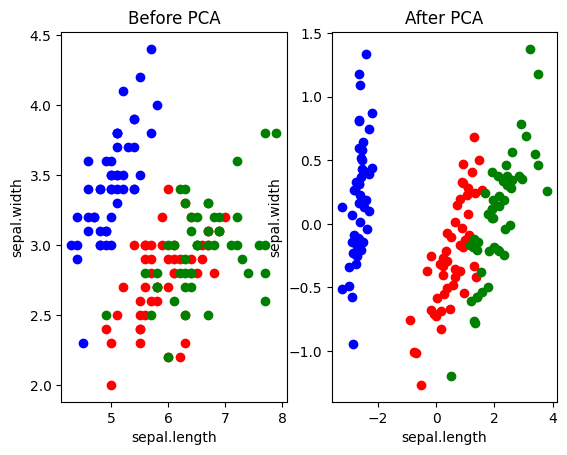

In [9]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)
start=0
grouped_df = df.groupby('variety')
for group_name, sub_df in grouped_df:
  size=sub_df.shape[0]
  if group_name == 'Setosa':
    color='b'
  elif group_name == 'Versicolor':
    color='r'
  elif group_name == 'Virginica':
    color='g'
  ax1.scatter(X.iloc[start:start+size-1,0], X.iloc[start:start+size-1,1], c=color)
  ax2.scatter(X_pca[start:start+size-1,0], X_pca[start:start+size-1,1], c=color)
  start+=size

ax1.set_title('Before PCA')
ax2.set_title('After PCA')
ax1.set_xlabel(X.columns[0])
ax1.set_ylabel(X.columns[1])
ax2.set_xlabel(X.columns[0])
ax2.set_ylabel(X.columns[1])

### 5) Scaling PCA
It is recommended that PCA is scaled beforehand as follows:
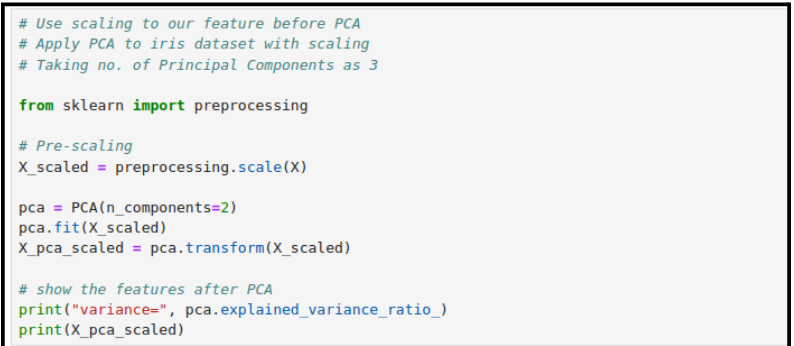

In [10]:
from sklearn import preprocessing

X_scaled = preprocessing.scale(X)

pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca_scaled = pca.transform(X_scaled)

print("variance=", pca.explained_variance_ratio_)
print(X_pca_scaled)

variance= [0.72962445 0.22850762]
[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]
 [-2.07563095  1.48917752]
 [-2.44402884  0.0476442 ]
 [-2.23284716  0.22314807]
 [-2.33464048 -1.11532768]
 [-2.18432817 -0.46901356]
 [-2.1663101   1.04369065]
 [-2.32613087  0.13307834]
 [-2.2184509  -0.72867617]
 [-2.6331007  -0.96150673]
 [-2.1987406   1.86005711]
 [-2.26221453  2.68628449]
 [-2.2075877   1.48360936]
 [-2.19034951  0.48883832]
 [-1.898572    1.40501879]
 [-2.34336905  1.12784938]
 [-1.914323    0.40885571]
 [-2.20701284  0.92412143]
 [-2.7743447   0.45834367]
 [-1.81866953  0.08555853]
 [-2.22716331  0.13725446]
 [-1.95184633 -0.62561859]
 [-2.05115137  0.24216355]
 [-2.16857717  0.52714953]
 [-2.13956345  0.31321781]
 [-2.26526149 -0.3377319 ]
 [-2.14012214 -0.50454069]
 [-1.83159477  0.42369507]
 [-2.61494794  1.79357586]
 [-2.44617739  2.15072788]
 [-2.10997488 -0.46020184]
 [-2.2078089  -0.2061

### 6) Compare PCA to the scaled PCA
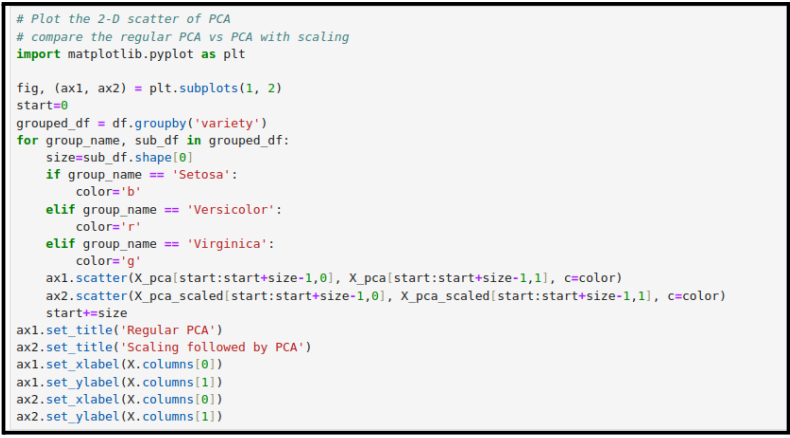

Text(0, 0.5, 'sepal.width')

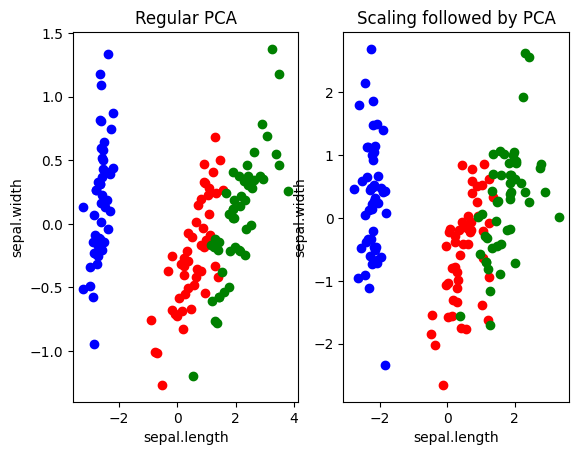

In [11]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)
start=0
grouped_df = df.groupby('variety')
for group_name, sub_df in grouped_df:
  size=sub_df.shape[0]
  if group_name == 'Setosa':
    color='b'
  elif group_name == 'Versicolor':
    color='r'
  elif group_name == 'Virginica':
    color='g'
  ax1.scatter(X_pca[start:start+size-1,0], X_pca[start:start+size-1,1], c=color)
  ax2.scatter(X_pca_scaled[start:start+size-1,0], X_pca_scaled[start:start+size-1,1], c=color)
  start+=size

ax1.set_title('Regular PCA')
ax2.set_title('Scaling followed by PCA')
ax1.set_xlabel(X.columns[0])
ax1.set_ylabel(X.columns[1])
ax2.set_xlabel(X.columns[0])
ax2.set_ylabel(X.columns[1])

## Experiment 2.2 : LDA


Linear discriminant analysis (LDA), also known as discriminant function analysis (DFA), builds on Fisher's linear discriminant. It is a dimensionality reduction technique that is used in supervised machine learning. The primary function of LDA is to project high-dimensional data onto a lower-dimensional space while retaining the data's inherent class separability. LDA can be
applied to enhance the operation of classification algorithms such as a decision tree or random forest.

LDA uses Bayes' theorem to classify new data points. It operates under two main assumptions:
the data follows a normal or Gaussian distribution, and the covariance matrices of the classes are equal. This dimensionality reduction technique separates data points by using linear transformations, which are analyzed by using represent directions, while eigenvalues represent significance. Eigenvectors are calculated from the data set and collected in two class scatter matrices the between-class scatter matrix and the within-class scatter matrix.
LDA can be used for binary and multi-class classification problems, unlike logistic regression, which is limited to binary classification.

### 1) Load iris dataset
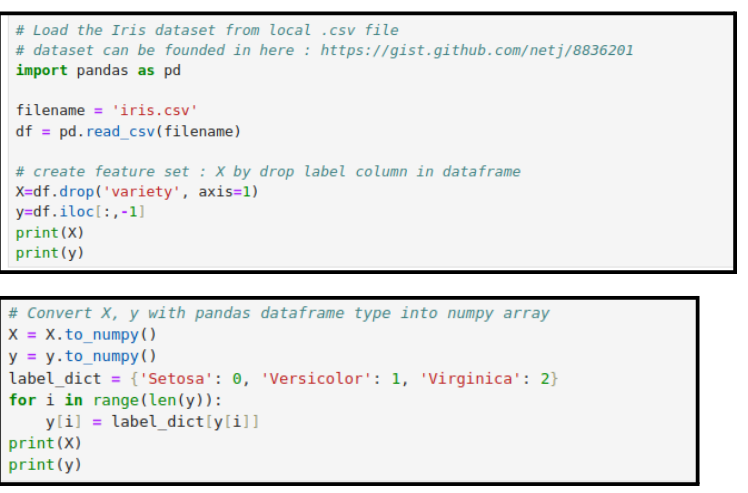

In [12]:
import pandas as pd

filename = 'iris.csv'
df = pd.read_csv(filename)

# create feature set :X by drop label column in dataframe
X = df.drop('variety', axis=1)
y = df.iloc[:, -1]
print(X)
print(y)

     sepal.length  sepal.width  petal.length  petal.width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object


In [13]:
# Convert X, y with pandas dataframe type into numpy array
X = X.to_numpy()
y = y.to_numpy()

label_dict = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}

for i in range(len(y)):
    y[i] = label_dict[y[i]]

print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

### 2) LDA Computing
Now that we have all the data loaded, we’re ready to start LDA computing. It consists of five
steps:
Step 1 : Computing the d-dimensional mean vectors.

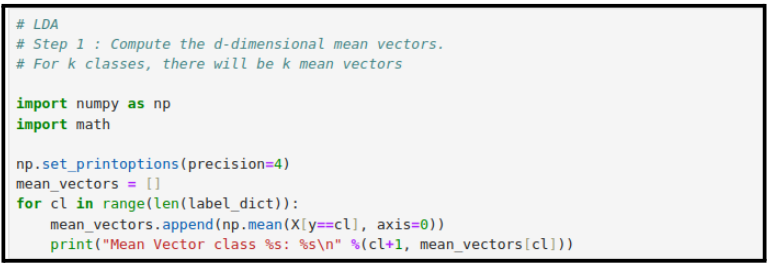

In [14]:
# LDA
# Step 1 : Compute the d-dimensional mean vectors
# for k classes, there will be k-mean vectors

import numpy as np
import math

np.set_printoptions(precision=4)
mean_vectors = []
for cl in range(len(label_dict)):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print("Mean Vector class %s: %s\n" %(cl+1, mean_vectors[cl]))

Mean Vector class 1: [5.006 3.428 1.462 0.246]

Mean Vector class 2: [5.936 2.77  4.26  1.326]

Mean Vector class 3: [6.588 2.974 5.552 2.026]



Step 2 : Computing the Scatter Matrices
For this algorithm to work, we need to compute two scatter matrices: the within-class scatter
matrix and the between-class scatter matrix.


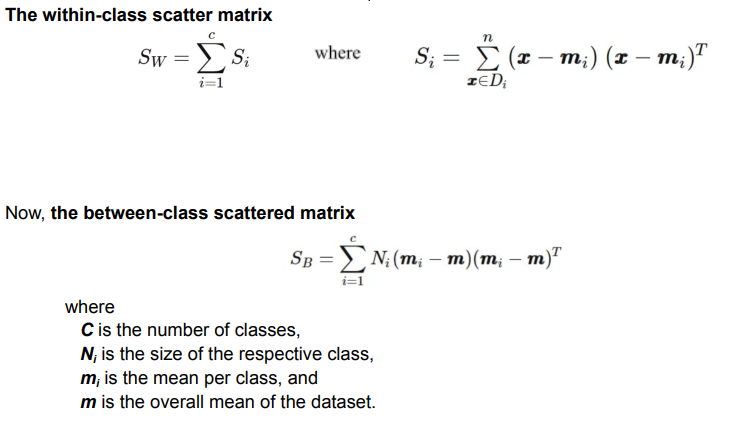

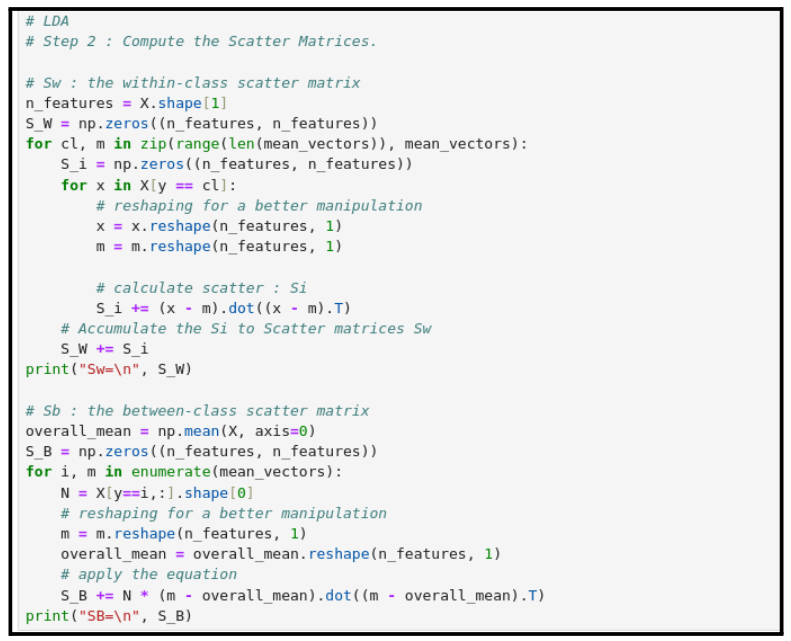

In [15]:
# LDA
# Step 2 : Compute the Scatter Matrices

# SW : the within class scatter matrix
n_features = X.shape[1]
S_W = np.zeros((n_features, n_features))
for cl, m in zip(range(len(mean_vectors)), mean_vectors):
    S_i = np.zeros((n_features, n_features))
    for x in X[y==cl]:
        #reshaping for a better manipulation
        x = x.reshape(n_features, 1)
        m = m.reshape(n_features, 1)
        
        # Calculate scatter : Si
        S_i += (x - m).dot((x - m).T)
     # Accumulate the Si to Scatter Matrices Sw
    S_W += S_i
print("Sw = \n", S_W)

# Sb : the between class scatter matrix
overall_mean = np.mean(X, axis=0)
S_B = np.zeros((n_features, n_features))
for i, m in enumerate(mean_vectors):
    N = X[y==i, :].shape[0]
    # reshaping for better manipulation
    m = m.reshape(n_features, 1)
    overall_mean = overall_mean.reshape(n_features, 1)
    # apply the equation
    S_B += N * (m - overall_mean).dot((m - overall_mean).T)
print("SB = \n", S_B)

Sw = 
 [[38.9562 13.63   24.6246  5.645 ]
 [13.63   16.962   8.1208  4.8084]
 [24.6246  8.1208 27.2226  6.2718]
 [ 5.645   4.8084  6.2718  6.1566]]
SB = 
 [[ 63.2121 -19.9527 165.2484  71.2793]
 [-19.9527  11.3449 -57.2396 -22.9327]
 [165.2484 -57.2396 437.1028 186.774 ]
 [ 71.2793 -22.9327 186.774   80.4133]]


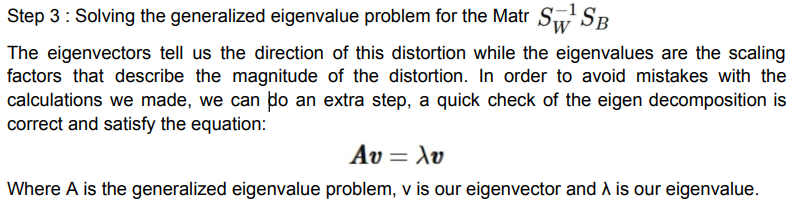
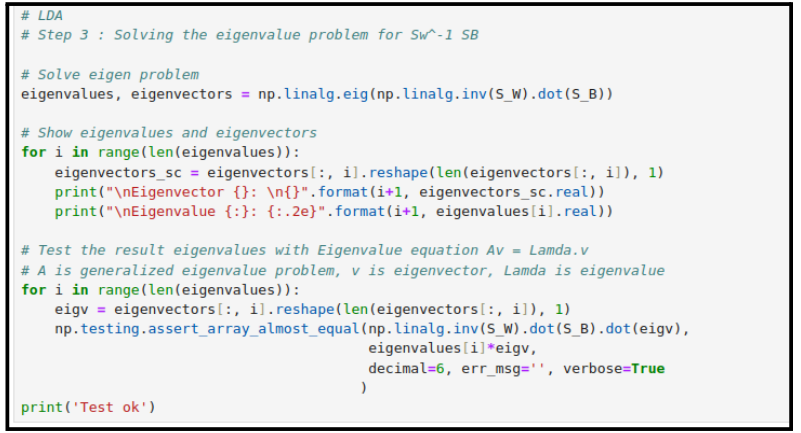

In [16]:
# LDA 
# Step 3 : Solving the eigenvalue problem for SW^-1 SB

# Solve eigen problem
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

# Show eigenvalues an eigenvectors
for i in range(len(eigenvalues)):
    eigenvectors_sc = eigenvectors[:, i].reshape(len(eigenvectors[:, i]), 1)
    print("\nEigenvector {}:  \n{}:".format(i+1, eigenvectors_sc.real))
    print("\nEigenvalue  {:}:  {:.2e}".format(i+1, eigenvalues[i].real))
    
# Test the result eigenvalues with eigenvalue eqaution Av = Lambda.v
# A is generalized eigenvalue problem, v is eigenvector, Lamda is eigenvalue

for i in range(len(eigenvalues)):
    eigv = eigenvectors[:, i].reshape(len(eigenvectors[:, i]), 1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                        eigenvalues[i]*eigv,
                                        decimal=6, err_msg='', verbose=True)
print('Test ok')


Eigenvector 1:  
[[ 0.2087]
 [ 0.3862]
 [-0.554 ]
 [-0.7074]]:

Eigenvalue  1:  3.22e+01

Eigenvector 2:  
[[-0.0065]
 [-0.5866]
 [ 0.2526]
 [-0.7695]]:

Eigenvalue  2:  2.85e-01

Eigenvector 3:  
[[ 0.6889]
 [-0.366 ]
 [-0.3775]
 [ 0.1618]]:

Eigenvalue  3:  1.92e-15

Eigenvector 4:  
[[ 0.6889]
 [-0.366 ]
 [-0.3775]
 [ 0.1618]]:

Eigenvalue  4:  1.92e-15
Test ok


Step 4 : Selecting linear discriminants for the new feature subspace
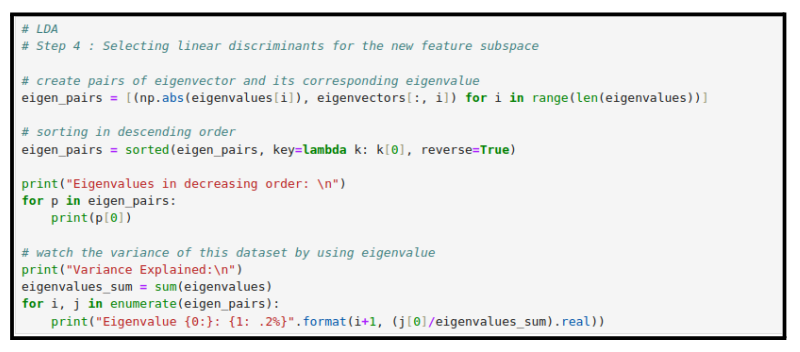

In [17]:
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range (len(eigenvalues))]

eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

print("Eigenvalues in decreasing order: \n")
for p in eigen_pairs:
    print(p[0])
    
print("Variance Explained:\n")
eigenvalues_sum = sum(eigenvalues)

for i, j in enumerate(eigen_pairs):
    print("Eigenvalue {0:}: {1: .2%}".format(i+1, (j[0]/eigenvalues_sum).real))

Eigenvalues in decreasing order: 

32.19192919827802
0.28539104262307097
2.285672327541462e-15
2.285672327541462e-15
Variance Explained:

Eigenvalue 1:  99.12%
Eigenvalue 2:  0.88%
Eigenvalue 3:  0.00%
Eigenvalue 4:  0.00%


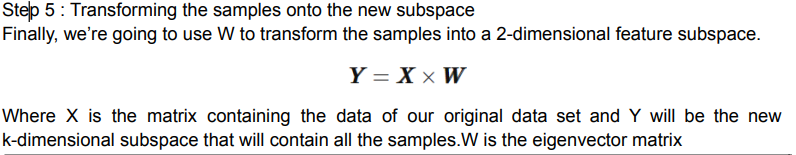
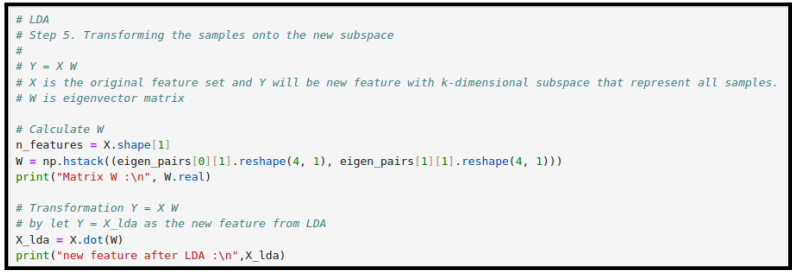

In [18]:
n_features = X.shape[1]
W = np.hstack((eigen_pairs[0][1].reshape(4,1), eigen_pairs[1][1].reshape(4,1)))
print("Matrix W :\n", W.real)

X_lda = X.dot(W)
print("new feature after LDA :\n", X_lda)

Matrix W :
 [[ 0.2087 -0.0065]
 [ 0.3862 -0.5866]
 [-0.554   0.2526]
 [-0.7074 -0.7695]]
new feature after LDA :
 [[ 1.4992+0.j -1.8868+0.j]
 [ 1.2644+0.j -1.5921+0.j]
 [ 1.3553+0.j -1.7334+0.j]
 [ 1.185 +0.j -1.6236+0.j]
 [ 1.517 +0.j -1.9448+0.j]
 [ 1.4086+0.j -2.2015+0.j]
 [ 1.2855+0.j -1.9018+0.j]
 [ 1.3843+0.j -1.8022+0.j]
 [ 1.1214+0.j -1.5302+0.j]
 [ 1.3183+0.j -1.5486+0.j]
 [ 1.5837+0.j -1.9808+0.j]
 [ 1.2872+0.j -1.7756+0.j]
 [ 1.3142+0.j -1.5145+0.j]
 [ 1.3761+0.j -1.587 +0.j]
 [ 1.9492+0.j -2.2351+0.j]
 [ 1.7752+0.j -2.5473+0.j]
 [ 1.6302+0.j -2.3025+0.j]
 [ 1.4285+0.j -1.9637+0.j]
 [ 1.5034+0.j -2.0678+0.j]
 [ 1.4889+0.j -2.1144+0.j]
 [ 1.357 +0.j -1.7543+0.j]
 [ 1.3796+0.j -2.1327+0.j]
 [ 1.6551+0.j -2.0432+0.j]
 [ 1.0436+0.j -1.9245+0.j]
 [ 1.121 +0.j -1.6999+0.j]
 [ 1.1744+0.j -1.5423+0.j]
 [ 1.1874+0.j -1.9308+0.j]
 [ 1.4647+0.j -1.8622+0.j]
 [ 1.4815+0.j -1.8287+0.j]
 [ 1.189 +0.j -1.6576+0.j]
 [ 1.1713+0.j -1.5996+0.j]
 [ 1.3263+0.j -1.9587+0.j]
 [ 1.7671+0.j -2.1372+

### 3) Plot LDA
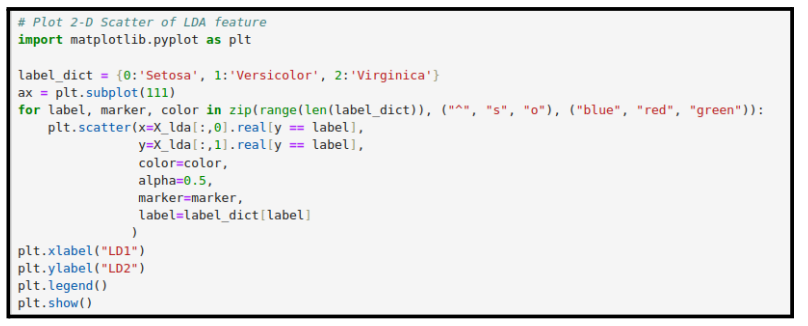

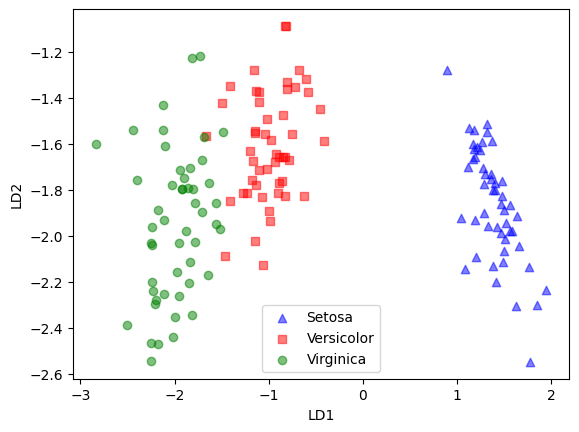

In [19]:
import matplotlib.pyplot as plt

label_dict = {0:'Setosa', 1:'Versicolor', 2:'Virginica'}
ax = plt.subplot(111)

for label, marker, color in zip(range(len(label_dict)), ("^", "s", "o"), ("blue", "red", "green")):
    plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
               color=color,
               alpha=0.5,
               marker=marker,
               label=label_dict[label]
               )
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.show()                

### 4) LDA using “sklearn”

Step 1: Load the Data

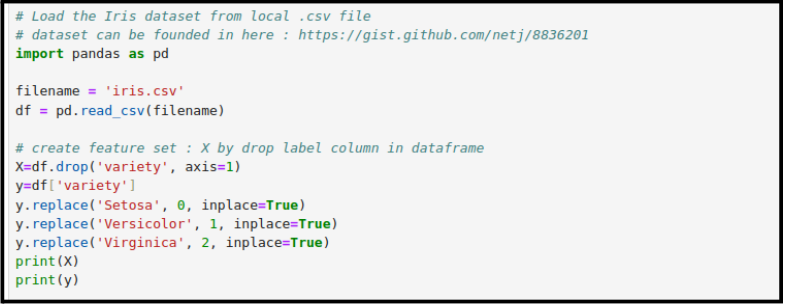

In [20]:
import pandas as pd

filename = 'iris.csv'

df = pd.read_csv(filename)

X=df.drop('variety', axis=1)
y=df['variety']
y.replace('Setosa', 0, inplace=True)
y.replace('Versicolor', 1, inplace=True)
y.replace('Virginica', 2, inplace=True)

print(X)
print(y)

     sepal.length  sepal.width  petal.length  petal.width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: variety, Length: 150, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_2796\3385383450.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace('Virginica', 2, inplace=True)


Step 2: Fit the LDA Model

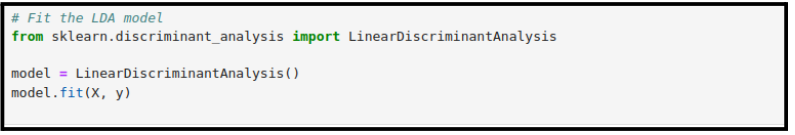

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

Step 3: Plot LDA
we can create an LDA plot to view the linear discriminants of the model and visualize how well it
separated the three different species in our dataset

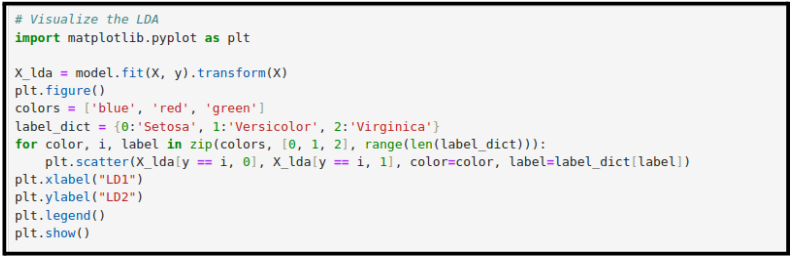

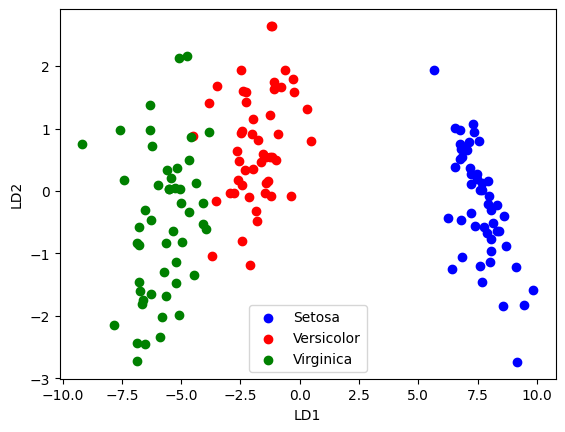

In [22]:
import matplotlib.pyplot as plt

X_lda = model.fit(X, y).transform(X)
plt.figure()
colors = ['blue', 'red', 'green']
label_dict = {0:'Setosa', 1:'Versicolor', 2:'Virginica'}

for color, i, label in zip(colors, [0, 1, 2], range(len(label_dict))):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], color=color, label=label_dict[label])
    
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.show()

Step 4: Cross Validation, Use the Model to Make Predictions
Once we’ve fitted the model using our data, we can evaluate how well the model performed by
using repeated stratified k-fold cross validation. For this example, we’ll use 10 folds and 3
repeats:
We can see that the model performed a mean accuracy of 97.78%. We can also use the model
to predict which class a new flower belongs to, based on input values: [5, 3, 1, -4]
We can see that the model predicts this new observation to belong to the species called setosa.

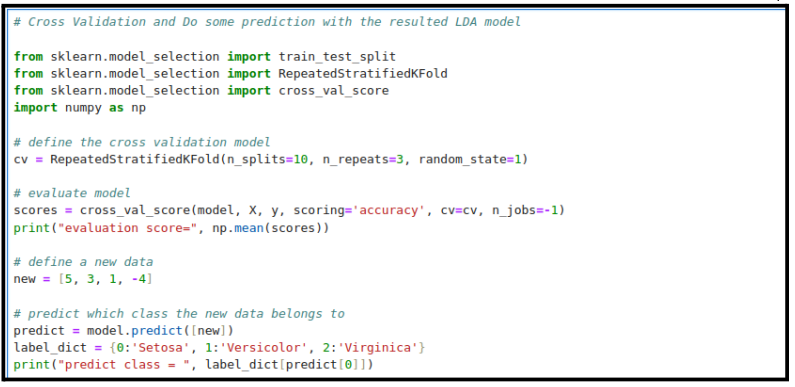

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X, y, scoring="accuracy", cv=cv, n_jobs=-1)
print("evaluation score = ", np.mean(scores))

new = [5, 3, 1, -4]

predict = model.predict([new])
label_dict = {0:'Setosa', 1:'Versicolor', 2:'Virginica'}
print("predict class = ", label_dict[predict[0]])

evaluation score =  0.9800000000000001
predict class =  Setosa


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


## Experiment 2.3 : t-SNE dimensionality reduction

Basic t-SNE projections
t-SNE is a popular dimensionality reduction algorithm that arises from probability theory
by projecting the high-dimensional data points into 2D/3D by inducing the projected data to have
a similar distribution as the original data points by minimizing something called the KL
divergence. Compared to a method like Principal Component Analysis, it takes significantly
more time to converge but presents significantly better insights when visualized. For example,
by projecting features of a flowers, it will be able to distinctly group.

Visualizing high-dimensional data with “px.scatterjTiatrix”
We will use the Scatter Plot Matrix which lets plot each feature against everything else,
which is convenient when your dataset has more than 3 dimensions. Project data into 2D with
t-SNE and “px.scatter”

### Step 1 : Prepare IRIS dataset and do a scatter plot
we will try a new plot tool plotly instead of matplotlib

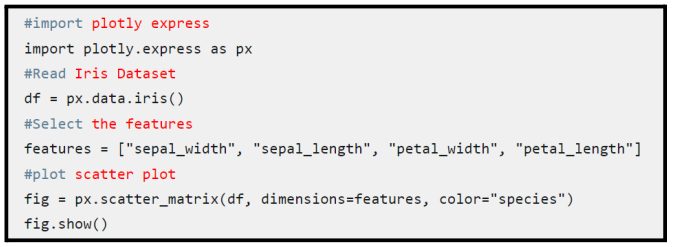

### Step 2 : Apply t-SNE and plot the feature seperation

Now, let's use the t-SNE algorithm to project the data shown above into two dimensions. Notice
how each of the species is physically separate from each other.

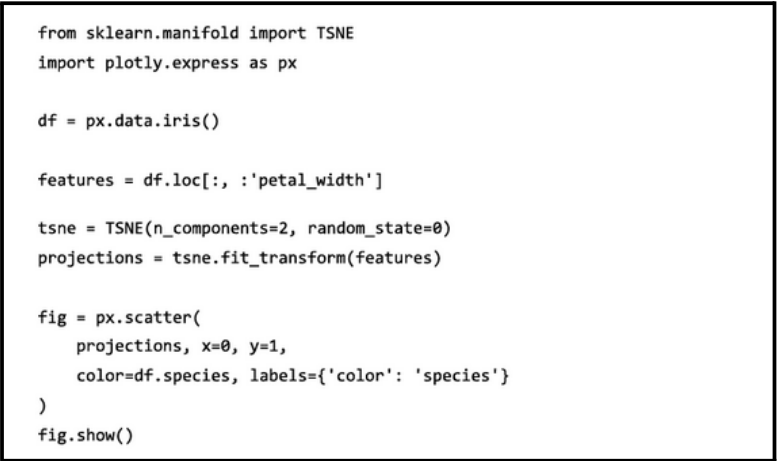

### Step 3 : Project data into 3D with t-SNE and px.scatter_3d

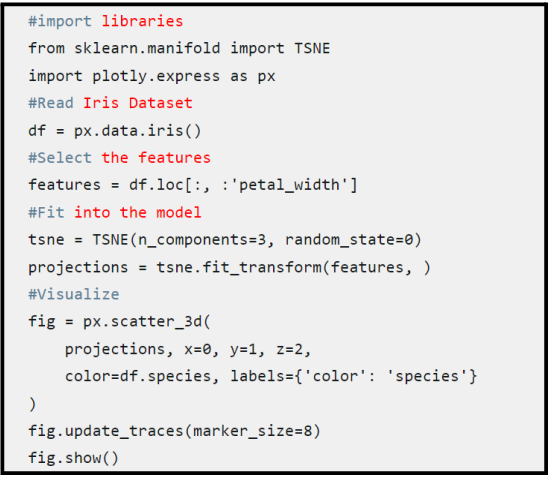

## Experiment 2.4 : UMAP

UMAP is a manifold learning technique that aims to reduce the dimensionality of data while
preserving its topological structure. It is particularly useful for visualizing high-dimensional
datasets in a low- dimensional space, typically two or three dimensions. UMAP is often
compared to t-SNE due to its similar application in data visualization, but it offers several
advantages, including better preservation of global data structure and faster computation times.

Projections with UMAP
In this example, we see how easy it is to use UMAP as a drop-in replacement for scikit-learn's
manifold.TSNE.

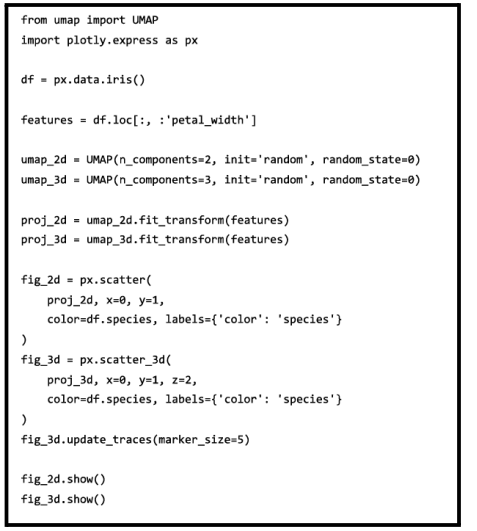

# Experiment 3 : Using PCA for image compression

Obtain the image from a setup camera and use the reduced dimension from PCA technique,
then transform back to compare with the original images.


## Step 1 : Prepare the image

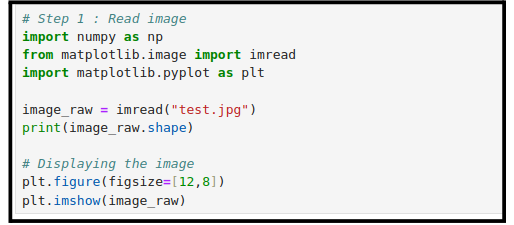

### Step 2 : Convert RGB image to Grayscale image

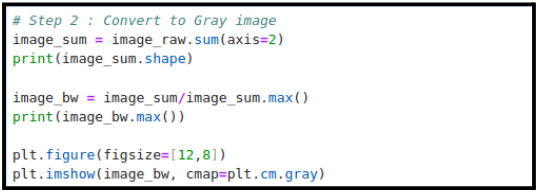

### Step 3 : Perform PCA to grayscale image data
● We'll perform PCA on the matrix with all the components
● We'll then look at the scree-plot to assess how many components we could retain
and how much cumulative variance they capture
● We'll pick a suitable number of components to represent the image for
compression

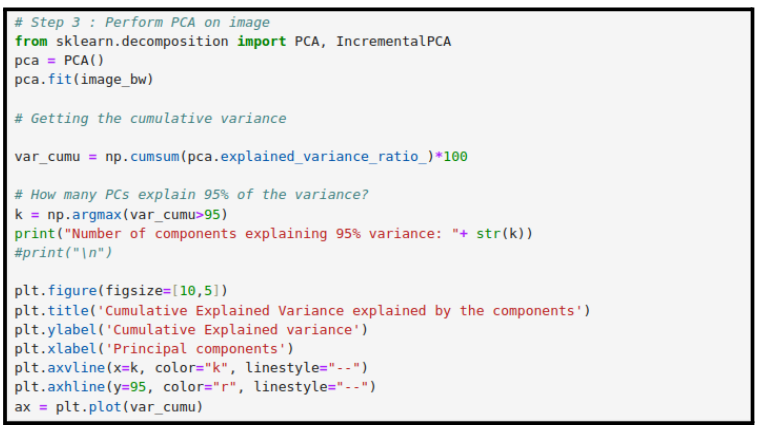

### Step 3 : Reconstruct the image from PCA data
Create a function which allows you to select the number of PCA components for the
image data. Then, run with different numbers and compare the result.

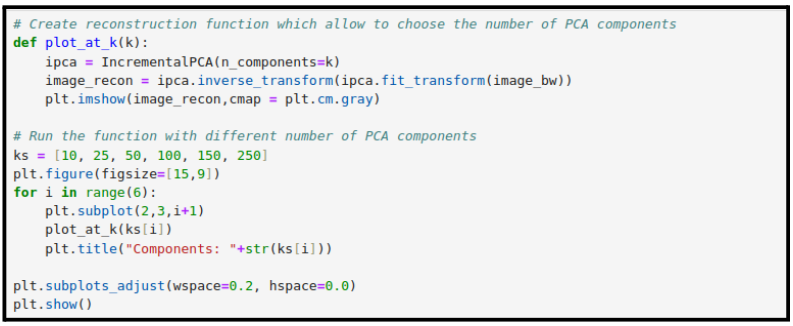